---
MAT421 - Applied Computational Methods

Arizona State University

Homework #12

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 22 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 22. Ordinary Differential Equation - Initial Value Problems
---

## 22.4 Numerical Error and Instability

Accuracy and stability are two main concerns with respect to numerical methods for ODEs. Accuracy is the ability to get close to the exact solution. Stability refers to ability to keep the error from growing as the ODE methods integrate forward. When error does not grow the method is stable, otherwise the method is considered unstable. Some methods are only stable for certain step sizes, $h$, but unstable for others. These methods are unstable. 

For example, solving for a pendulum equation yields some unstable results using Euler's methods but is stable for the trapezoidal method.

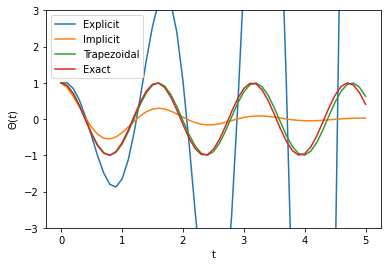

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv


h = 0.1
t = np.arange(0,5.1,h)

w = 4

s0 = np.array([[1],[0]])

m_e = np.array([[1,h],[-w**2*h,1]])
m_i = inv(np.array([[1,-h],[w**2*h,1]]))
m_t = np.dot(inv(np.array([[1,-h/2],[w**2*h/2,1]])),np.array([[1,h/2],[-w**2*h/2,1]]))

s_e = np.zeros((len(t),2))
s_i = np.zeros((len(t),2))
s_t = np.zeros((len(t),2))

s_e[0,:] = s0.T
s_i[0,:] = s0.T
s_t[0,:] = s0.T

for i in range(0,len(t)-1):
  s_e[i+1,:] = np.dot(m_e,s_e[i,:])
  s_i[i+1,:] = np.dot(m_i,s_i[i,:])
  s_t[i+1,:] = np.dot(m_t,s_t[i,:])

plt.plot(t,s_e[:,0])
plt.plot(t,s_i[:,0])
plt.plot(t,s_t[:,0])
plt.plot(t,np.cos(w*t))
plt.ylim([-3,3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit','Implicit','Trapezoidal','Exact'],loc='upper left')
plt.show()


## 22.5 Predictor-Corrector and Runge Kutta Methods

### Predictor-Corrector
With predictor-corrector methods, a solution is first predicted then a corrector is used to improve accuracy.

An example is the midpoint method,

$$S\bigg(t_j+\frac{h}{2}\bigg)=S(t_j)+\frac{h}{2}F(t_j,S(t_j)),$$

which is a predictor between $t_j$ and $t_{j+1}$. And it's corrector,

$$S(t_{j+1})=S(t_j)+hF\bigg(t_j+\frac{h}{2},S\bigg(t_j+\frac{h}{2}\bigg)\bigg),$$

which computes the solution at $S(t_{j+1}).$

### Runge Kutta

Runge Kutta (RK) methods make use of truncated Taylor series without actually computing higher derivatives in the series.

#### Second-Order Runge Kutta (RK2)

\begin{align*}
k_1 &= F(t_j,S(t_j)) \\
k_2 &= F(t_j+h,S(t_j)+hk_1)
\end{align*}

$$S(t_{j+1})=S(t_j)+\frac{h}{2}(k_1+k_2)$$

#### Fourth-Order Runge Kutta (RK4)

\begin{align*}
k_1 &= F(t_j,S(t_j)) \\
k_2 &= F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h) \\
k_3 &= F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h) \\
k_4 &= F(t_j+h,S(t_j)+k_3h)
\end{align*}

$$S(t_{j+1})=S(t_j)+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$$


## 22.6 Python ODE Solvers

Initial value problems can be solved with Python using scipy.integrate.solve_ivp. The default method is 5th-Order Runge Kutta.

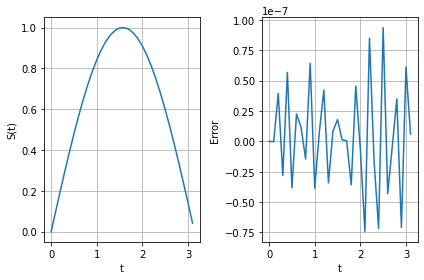

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0,np.pi,0.1)
sol = solve_ivp(F,[0,np.pi],[0],t_eval=t_eval,rtol=1e-8,atol=1e-8)

plt.subplot(121)
plt.plot(sol.t,sol.y[0])
plt.grid()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t,sol.y[0]-np.sin(sol.t))
plt.grid()
plt.xlabel('t')
plt.ylabel('Error')
plt.tight_layout()
plt.show()


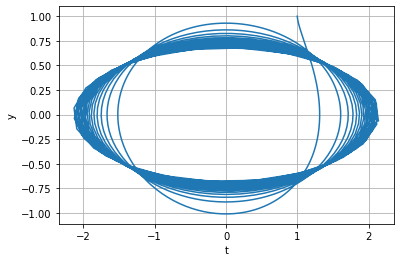

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

F = lambda t, s: np.dot(np.array([[0,t**2],[-t,0]]),s)

t_eval = np.arange(0,10.01,0.01)
sol = solve_ivp(F,[0,10],[1,1],t_eval=t_eval,rtol=1e-8,atol=1e-8)

plt.plot(sol.y.T[:,0],sol.y.T[:,1])
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.show()